In [41]:
import pandas as pd
import numpy as np
import geopandas as gp
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_excel('National Database for WSS Access.xlsx', header=5)
df = df.iloc[3:1376,:10]
df = df.reset_index(drop=True)
df = df.drop(columns=['RANK'])
df.head()

,JCODE,NO.,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,WITH ACCESS TO SAFE WATER SOURCE
0,CARABRABANGUED (Capital),1.0,CAR,ABRA,BANGUED (Capital),1ST,48163.0,8027.166667,7020
1,CARABRABOLINEY,2.0,CAR,ABRA,BOLINEY,5TH,3573.0,595.500000,595.5
2,CARABRABUCAY,3.0,CAR,ABRA,BUCAY,5TH,17115.0,2852.500000,2599.5
3,CARABRABUCLOC,4.0,CAR,ABRA,BUCLOC,6TH,2501.0,416.833333,415.833
4,CARABRADAGUIOMAN,5.0,CAR,ABRA,DAGUIOMAN,5TH,2088.0,348.000000,348


In [3]:
df.columns

Index(['JCODE', 'NO.', 'Region', 'Province', 'City/Municipality',
       ' INCOME CLASS', 'TOTAL POPULATION (PSA 2015)', 'TOTAL HHs',
       'WITH ACCESS TO SAFE WATER SOURCE'],
      dtype='object')

In [4]:
df.columns = df.columns.str.replace(' INCOME CLASS', 'INCOME CLASS')
df.columns = df.columns.str.replace('WITH ACCESS TO SAFE WATER SOURCE', 'HHs WITH ACCESS')

In [5]:
#Checking for nan values
df.isna().sum()

JCODE                          0
NO.                            0
Region                         0
Province                       0
City/Municipality              0
INCOME CLASS                   0
TOTAL POPULATION (PSA 2015)    0
TOTAL HHs                      0
HHs WITH ACCESS                0
dtype: int64

In [6]:
df.shape

(1373, 9)

Cleaning column values

In [7]:
df['INCOME CLASS'].unique().tolist()

['1ST', '5TH', '6TH', '2ND', '4TH', '3RD', '1ND']

In [8]:
df[df['INCOME CLASS']=='1ND']

,JCODE,NO.,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS
255,REGION IIISABELASAN PABLO,256.0,REGION II,ISABELA,SAN PABLO,1ND,25384.0,4230.666667,1077


Based on DILG Website, San Pablo City is Income Class: 1

In [9]:
df['INCOME CLASS'].replace('1ND','1ST',inplace=True)
df['INCOME CLASS'].unique().tolist()

['1ST', '5TH', '6TH', '2ND', '4TH', '3RD']

In [10]:
df['INCOME CLASS'] = df['INCOME CLASS'].str.extract('(\d+)', expand=False)
df.head()

,JCODE,NO.,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS
0,CARABRABANGUED (Capital),1.0,CAR,ABRA,BANGUED (Capital),1,48163.0,8027.166667,7020
1,CARABRABOLINEY,2.0,CAR,ABRA,BOLINEY,5,3573.0,595.500000,595.5
2,CARABRABUCAY,3.0,CAR,ABRA,BUCAY,5,17115.0,2852.500000,2599.5
3,CARABRABUCLOC,4.0,CAR,ABRA,BUCLOC,6,2501.0,416.833333,415.833
4,CARABRADAGUIOMAN,5.0,CAR,ABRA,DAGUIOMAN,5,2088.0,348.000000,348


In [11]:
df.iloc[:,5:] = df.iloc[:,5:].astype(float)
df.dtypes

JCODE                           object
NO.                            float64
Region                          object
Province                        object
City/Municipality               object
INCOME CLASS                   float64
TOTAL POPULATION (PSA 2015)    float64
TOTAL HHs                      float64
HHs WITH ACCESS                float64
dtype: object

Add additional columns

In [12]:
df['HHs WITHOUT ACCESS'] = df['TOTAL HHs'] - df['HHs WITH ACCESS']
df['% HHs WITHOUT ACCESS'] = df['HHs WITHOUT ACCESS']/df['TOTAL HHs']
df['HH Size'] = df['TOTAL POPULATION (PSA 2015)']/df['TOTAL HHs']
df['POPULATION WITH ACCESS'] = df['HHs WITH ACCESS']*df['HH Size']
df['POPULATION WITHOUT ACCESS'] = df['TOTAL POPULATION (PSA 2015)'] - df['POPULATION WITH ACCESS']
df['%'] = df['POPULATION WITHOUT ACCESS'] / df['TOTAL POPULATION (PSA 2015)']
df.head()

,JCODE,NO.,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%
0,CARABRABANGUED (Capital),1.0,CAR,ABRA,BANGUED (Capital),1.0,48163.0,8027.166667,7020.000000,1007.166667,0.125470,6.0,42120.0,6043.0,0.125470
1,CARABRABOLINEY,2.0,CAR,ABRA,BOLINEY,5.0,3573.0,595.500000,595.500000,0.000000,0.000000,6.0,3573.0,0.0,0.000000
2,CARABRABUCAY,3.0,CAR,ABRA,BUCAY,5.0,17115.0,2852.500000,2599.500000,253.000000,0.088694,6.0,15597.0,1518.0,0.088694
3,CARABRABUCLOC,4.0,CAR,ABRA,BUCLOC,6.0,2501.0,416.833333,415.833333,1.000000,0.002399,6.0,2495.0,6.0,0.002399
4,CARABRADAGUIOMAN,5.0,CAR,ABRA,DAGUIOMAN,5.0,2088.0,348.000000,348.000000,0.000000,0.000000,6.0,2088.0,0.0,0.000000


In [13]:
df.sort_values(by='HHs WITHOUT ACCESS',ascending=False)

,JCODE,NO.,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%
515,REGION IVARIZALRODRIGUEZ (MONTALBAN),516.0,REGION IVA,RIZAL,RODRIGUEZ (MONTALBAN),1.0,369222.0,61537.000000,22849.000000,38688.000000,0.628695,6.0,137094.0,232128.0,0.628695
432,REGION IVACAVITEGENERAL TRIAS,433.0,REGION IVA,CAVITE,GENERAL TRIAS,1.0,314303.0,52383.833333,17681.000000,34702.833333,0.662472,6.0,106086.0,208217.0,0.662472
319,REGION IIIBULACANSANTA MARIA,320.0,REGION III,BULACAN,SANTA MARIA,1.0,256454.0,42742.333333,18937.000000,23805.333333,0.556950,6.0,113622.0,142832.0,0.556950
442,REGION IVACAVITETANZA,443.0,REGION IVA,CAVITE,TANZA,1.0,226188.0,37698.000000,14264.000000,23434.000000,0.621624,6.0,85584.0,140604.0,0.621624
516,REGION IVARIZALSAN MATEO,517.0,REGION IVA,RIZAL,SAN MATEO,1.0,252527.0,42087.833333,21695.000000,20392.833333,0.484530,6.0,130170.0,122357.0,0.484530
309,REGION IIIBULACANMARILAO,310.0,REGION III,BULACAN,MARILAO,1.0,221965.0,36994.166667,17518.000000,19476.166667,0.526466,6.0,105108.0,116857.0,0.526466
1272,REGION XIICOTABATO (NORTH COTABATO)MIDSAYAP,1273.0,REGION XII,COTABATO (NORTH COTABATO),MIDSAYAP,1.0,151684.0,25280.666667,8456.000000,16824.666667,0.665515,6.0,50736.0,100948.0,0.665515
1275,REGION XIICOTABATO (NORTH COTABATO)PIKIT,1276.0,REGION XII,COTABATO (NORTH COTABATO),PIKIT,1.0,154441.0,25740.166667,10651.000000,15089.166667,0.586211,6.0,63906.0,90535.0,0.586211
440,REGION IVACAVITEROSARIO,441.0,REGION IVA,CAVITE,ROSARIO,1.0,110706.0,18451.000000,4461.000000,13990.000000,0.758224,6.0,26766.0,83940.0,0.758224
169,REGION IPANGASINANMALASIQUI,170.0,REGION I,PANGASINAN,MALASIQUI,1.0,130275.0,21712.500000,8785.000000,12927.500000,0.595394,6.0,52710.0,77565.0,0.595394


In [14]:
df.sort_values(by='% HHs WITHOUT ACCESS',ascending=False)

,JCODE,NO.,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%
566,MIMAROPAPALAWANMAGSAYSAY,567.0,MIMAROPA,PALAWAN,MAGSAYSAY,5.0,12196.0,2032.666667,42.000000,1990.666667,0.979337,6.0,252.0,11944.0,0.979337
850,REGION VIIBOHOLPRES. CARLOS P. GARCIA (PITOGO),851.0,REGION VII,BOHOL,PRES. CARLOS P. GARCIA (PITOGO),4.0,23356.0,3892.666667,183.000000,3709.666667,0.952989,6.0,1098.0,22258.0,0.952989
553,MIMAROPAPALAWANARACELI,554.0,MIMAROPA,PALAWAN,ARACELI,4.0,14909.0,2484.833333,142.000000,2342.833333,0.942853,6.0,852.0,14057.0,0.942853
558,MIMAROPAPALAWANCAGAYANCILLO,559.0,MIMAROPA,PALAWAN,CAGAYANCILLO,6.0,6285.0,1047.500000,68.000000,979.500000,0.935084,6.0,408.0,5877.0,0.935084
853,REGION VIIBOHOLSAN MIGUEL,854.0,REGION VII,BOHOL,SAN MIGUEL,4.0,24135.0,4022.500000,345.000000,3677.500000,0.914232,6.0,2070.0,22065.0,0.914232
113,REGION IILOCOS SURSAN ILDEFONSO,114.0,REGION I,ILOCOS SUR,SAN ILDEFONSO,5.0,7787.0,1297.833333,114.000000,1183.833333,0.912161,6.0,684.0,7103.0,0.912161
79,REGION IILOCOS NORTEBANNA (ESPIRITU),80.0,REGION I,ILOCOS NORTE,BANNA (ESPIRITU),4.0,19438.0,3239.666667,300.000000,2939.666667,0.907398,6.0,1800.0,17638.0,0.907398
1231,REGION XIDAVAO DEL NORTECARMEN,1232.0,REGION XI,DAVAO DEL NORTE,CARMEN,1.0,74679.0,12446.500000,1186.000000,11260.500000,0.904712,6.0,7116.0,67563.0,0.904712
669,REGION VMASBATECAWAYAN,670.0,REGION V,MASBATE,CAWAYAN,2.0,67033.0,11172.166667,1184.000000,9988.166667,0.894022,6.0,7104.0,59929.0,0.894022
1230,REGION XIDAVAO DEL NORTEBRAULIO E. DUJALI,1231.0,REGION XI,DAVAO DEL NORTE,BRAULIO E. DUJALI,4.0,30104.0,5017.333333,563.000000,4454.333333,0.887789,6.0,3378.0,26726.0,0.887789


In [15]:
df.sort_values(by='POPULATION WITHOUT ACCESS',ascending=False)

,JCODE,NO.,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%
515,REGION IVARIZALRODRIGUEZ (MONTALBAN),516.0,REGION IVA,RIZAL,RODRIGUEZ (MONTALBAN),1.0,369222.0,61537.000000,22849.000000,38688.000000,0.628695,6.0,137094.0,232128.0,0.628695
432,REGION IVACAVITEGENERAL TRIAS,433.0,REGION IVA,CAVITE,GENERAL TRIAS,1.0,314303.0,52383.833333,17681.000000,34702.833333,0.662472,6.0,106086.0,208217.0,0.662472
319,REGION IIIBULACANSANTA MARIA,320.0,REGION III,BULACAN,SANTA MARIA,1.0,256454.0,42742.333333,18937.000000,23805.333333,0.556950,6.0,113622.0,142832.0,0.556950
442,REGION IVACAVITETANZA,443.0,REGION IVA,CAVITE,TANZA,1.0,226188.0,37698.000000,14264.000000,23434.000000,0.621624,6.0,85584.0,140604.0,0.621624
516,REGION IVARIZALSAN MATEO,517.0,REGION IVA,RIZAL,SAN MATEO,1.0,252527.0,42087.833333,21695.000000,20392.833333,0.484530,6.0,130170.0,122357.0,0.484530
309,REGION IIIBULACANMARILAO,310.0,REGION III,BULACAN,MARILAO,1.0,221965.0,36994.166667,17518.000000,19476.166667,0.526466,6.0,105108.0,116857.0,0.526466
1272,REGION XIICOTABATO (NORTH COTABATO)MIDSAYAP,1273.0,REGION XII,COTABATO (NORTH COTABATO),MIDSAYAP,1.0,151684.0,25280.666667,8456.000000,16824.666667,0.665515,6.0,50736.0,100948.0,0.665515
1275,REGION XIICOTABATO (NORTH COTABATO)PIKIT,1276.0,REGION XII,COTABATO (NORTH COTABATO),PIKIT,1.0,154441.0,25740.166667,10651.000000,15089.166667,0.586211,6.0,63906.0,90535.0,0.586211
440,REGION IVACAVITEROSARIO,441.0,REGION IVA,CAVITE,ROSARIO,1.0,110706.0,18451.000000,4461.000000,13990.000000,0.758224,6.0,26766.0,83940.0,0.758224
169,REGION IPANGASINANMALASIQUI,170.0,REGION I,PANGASINAN,MALASIQUI,1.0,130275.0,21712.500000,8785.000000,12927.500000,0.595394,6.0,52710.0,77565.0,0.595394


In [16]:
df[df['%']>0.5].count()

JCODE                          360
NO.                            360
Region                         360
Province                       360
City/Municipality              360
INCOME CLASS                   360
TOTAL POPULATION (PSA 2015)    360
TOTAL HHs                      360
HHs WITH ACCESS                360
HHs WITHOUT ACCESS             360
% HHs WITHOUT ACCESS           360
HH Size                        360
POPULATION WITH ACCESS         360
POPULATION WITHOUT ACCESS      360
%                              360
dtype: int64

In [17]:
df.describe()

,NO.,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%
count,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000
mean,687.000000,3.076475,41369.357611,6905.427531,4426.217609,2479.209922,0.332357,5.987618,26520.748118,14848.609493,0.332357
std,396.495271,1.473520,34822.987802,5801.221744,4002.230460,2952.689952,0.231697,0.123096,24023.128706,17715.662302,0.231697
min,1.000000,1.000000,184.000000,30.666667,30.666667,0.000000,0.000000,4.000000,184.000000,0.000000,0.000000
25%,344.000000,2.000000,20341.000000,3395.666667,1961.000000,525.000000,0.130536,6.000000,11743.000000,3150.000000,0.130536
50%,687.000000,3.000000,32745.000000,5463.833333,3370.000000,1734.666667,0.302742,6.000000,20180.000000,10364.000000,0.302742
75%,1030.000000,4.000000,52732.000000,8788.666667,5601.500000,3443.500000,0.512607,6.000000,33602.000000,20655.000000,0.512607
max,1373.000000,6.000000,369222.000000,61537.000000,48652.000000,38688.000000,0.979337,6.000000,291912.000000,232128.000000,0.979337


In [18]:
df['City/Municipality'].unique().tolist()

['BANGUED (Capital)',
 'BOLINEY',
 'BUCAY',
 'BUCLOC',
 'DAGUIOMAN',
 'DANGLAS',
 'DOLORES',
 'LA PAZ',
 'LACUB',
 'LAGANGILANG',
 'LAGAYAN',
 'LANGIDEN',
 'LICUAN-BAAY (LICUAN)',
 'LUBA',
 'MALIBCONG',
 'MANABO',
 'PEÑARRUBIA',
 'PIDIGAN',
 'PILAR',
 'SALLAPADAN',
 'SAN ISIDRO',
 'SAN JUAN',
 'SAN QUINTIN',
 'TAYUM',
 'TINEG',
 'TUBO',
 'VILLAVICIOSA',
 'CALANASAN (BAYAG)',
 'CONNER',
 'FLORA',
 'KABUGAO (Capital)',
 'LUNA',
 'PUDTOL',
 'SANTA MARCELA',
 'ATOK',
 'BAKUN',
 'BOKOD',
 'BUGUIAS',
 'ITOGON',
 'KABAYAN',
 'KAPANGAN',
 'KIBUNGAN',
 'LA TRINIDAD (Capital)',
 'MANKAYAN',
 'SABLAN',
 'TUBA',
 'TUBLAY',
 'AGUINALDO',
 'ALFONSO LISTA (POTIA)',
 'ASIPULO',
 'BANAUE',
 'HINGYON',
 'HUNGDUAN',
 'KIANGAN',
 'LAGAWE (Capital)',
 'LAMUT',
 'MAYOYAO',
 'TINOC',
 'BALBALAN',
 'LUBUAGAN',
 'PASIL',
 'PINUKPUK',
 'RIZAL (LIWAN)',
 'TANUDAN',
 'TINGLAYAN',
 'BARLIG',
 'BAUKO',
 'BESAO',
 'BONTOC (Capital)',
 'NATONIN',
 'PARACELIS',
 'SABANGAN',
 'SADANGA',
 'SAGADA',
 'TADIAN',
 'ADAMS',


In [19]:
df['City/Municipality']= df['City/Municipality'].str.split('(',n=1).str[0].apply(lambda x: x.rstrip())

In [20]:
df['Province'].unique()

array(['ABRA', 'APAYAO', 'BENGUET', 'IFUGAO', 'KALINGA',
       'MOUNTAIN PROVINCE', 'ILOCOS NORTE', 'ILOCOS SUR', 'LA UNION',
       'PANGASINAN', 'BATANES', 'CAGAYAN', 'ISABELA', 'NUEVA VIZCAYA',
       'QUIRINO', 'AURORA', 'BATAAN', 'BULACAN', 'NUEVA ECIJA',
       'PAMPANGA', 'TARLAC', 'ZAMBALES', 'BATANGAS', 'CAVITE', 'LAGUNA',
       'QUEZON', 'RIZAL', 'MARINDUQUE', 'OCCIDENTAL MINDORO',
       'ORIENTAL MINDORO', 'PALAWAN', 'ROMBLON', 'ALBAY',
       'CAMARINES NORTE', 'CAMARINES SUR', 'CATANDUANES', 'MASBATE',
       'SORSOGON', 'AKLAN', 'ANTIQUE', 'CAPIZ', 'GUIMARAS', 'ILOILO',
       'NEGROS OCCIDENTAL', 'BOHOL', 'CEBU', 'NEGROS ORIENTAL',
       'SIQUIJOR', 'BILIRAN', 'EASTERN SAMAR', 'LEYTE', 'NORTHERN SAMAR',
       'SAMAR (WESTERN SAMAR)', 'SOUTHERN LEYTE', 'ZAMBOANGA DEL NORTE',
       'ZAMBOANGA DEL SUR', 'ZAMBOANGA SIBUGAY', 'BUKIDNON', 'CAMIGUIN',
       'LANAO DEL NORTE', 'MISAMIS OCCIDENTAL', 'MISAMIS ORIENTAL',
       'COMPOSTELA VALLEY', 'DAVAO DEL NORTE', 'DAVAO 

In [21]:
df['Province'].replace('SAMAR (WESTERN SAMAR)', 'SAMAR', inplace=True)
df['Province'].replace('COTABATO (NORTH COTABATO)', 'NORTH COTABATO', inplace=True)

In [22]:
df['CODE'] = df[['Province', 'City/Municipality']].apply(lambda x: ' '.join(x), axis=1)

In [23]:
df['CODE'].unique()

array(['ABRA BANGUED', 'ABRA BOLINEY', 'ABRA BUCAY', ...,
       'SURIGAO DEL SUR SAN MIGUEL', 'SURIGAO DEL SUR TAGBINA',
       'SURIGAO DEL SUR TAGO'], dtype=object)

In [24]:
data = gp.read_file('MuniCities.shp')
data['NAME_1']=data['NAME_1'].apply(lambda x: x.upper())
data['NAME_2']=data['NAME_2'].apply(lambda x: x.upper())
data['CODE'] = data[['NAME_1', 'NAME_2']].apply(lambda x: ' '.join(x), axis=1)
data.describe()

,ID_0,ID_1,ID_2
count,1647.0,1647.000000,1647.000000
mean,177.0,41.703704,824.000000
std,0.0,22.451154,475.592262
min,177.0,1.000000,1.000000
25%,177.0,23.000000,412.500000
50%,177.0,42.000000,824.000000
75%,177.0,60.000000,1235.500000
max,177.0,82.000000,1647.000000


In [25]:
data.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,NL_NAME_2,VARNAME_2,TYPE_2,ENGTYPE_2,PROVINCE,REGION,geometry,CODE
0,177,PHL,Philippines,1,ABRA,20,SALLAPADAN,None,None,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.8181304931642 17.45325088500982,...",ABRA SALLAPADAN
1,177,PHL,Philippines,1,ABRA,21,SAN ISIDRO,None,None,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.6246414184573 17.44141006469749,...",ABRA SAN ISIDRO
2,177,PHL,Philippines,1,ABRA,22,SAN JUAN,None,None,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.8113708496096 17.74074935913097,...",ABRA SAN JUAN
3,177,PHL,Philippines,1,ABRA,23,SAN QUINTIN,None,None,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.534606933594 17.53930091857904, ...",ABRA SAN QUINTIN
4,177,PHL,Philippines,1,ABRA,24,TAYUM,None,None,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.6916885375981 17.63381958007824,...",ABRA TAYUM


In [26]:
new = df.merge(data)
new.head()

,JCODE,NO.,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,...,NAME_1,ID_2,NAME_2,NL_NAME_2,VARNAME_2,TYPE_2,ENGTYPE_2,PROVINCE,REGION,geometry
0,CARABRABANGUED (Capital),1.0,CAR,ABRA,BANGUED,1.0,48163.0,8027.166667,7020.000000,1007.166667,...,ABRA,1,BANGUED,None,None,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.6155319213872 17.62360000610363,..."
1,CARABRABOLINEY,2.0,CAR,ABRA,BOLINEY,5.0,3573.0,595.500000,595.500000,0.000000,...,ABRA,2,BOLINEY,None,None,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.9074935913088 17.41933059692394,..."
2,CARABRABUCAY,3.0,CAR,ABRA,BUCAY,5.0,17115.0,2852.500000,2599.500000,253.000000,...,ABRA,3,BUCAY,None,None,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.745483398438 17.57670974731457, ..."
3,CARABRABUCLOC,4.0,CAR,ABRA,BUCLOC,6.0,2501.0,416.833333,415.833333,1.000000,...,ABRA,4,BUCLOC,None,None,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.8247680664067 17.4172096252442, ..."
4,CARABRADAGUIOMAN,5.0,CAR,ABRA,DAGUIOMAN,5.0,2088.0,348.000000,348.000000,0.000000,...,ABRA,5,DAGUIOMAN,None,None,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.9814071655276 17.50534057617188,..."


In [27]:
new.isna().sum()

JCODE                             0
NO.                               0
Region                            0
Province                          0
City/Municipality                 0
INCOME CLASS                      0
TOTAL POPULATION (PSA 2015)       0
TOTAL HHs                         0
HHs WITH ACCESS                   0
HHs WITHOUT ACCESS                0
% HHs WITHOUT ACCESS              0
HH Size                           0
POPULATION WITH ACCESS            0
POPULATION WITHOUT ACCESS         0
%                                 0
CODE                              0
ID_0                              0
ISO                               0
NAME_0                            0
ID_1                              0
NAME_1                            0
ID_2                              0
NAME_2                            0
NL_NAME_2                      1354
VARNAME_2                      1301
TYPE_2                            0
ENGTYPE_2                         0
PROVINCE                    

/Users/raei/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/raei/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/raei/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/raei/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.

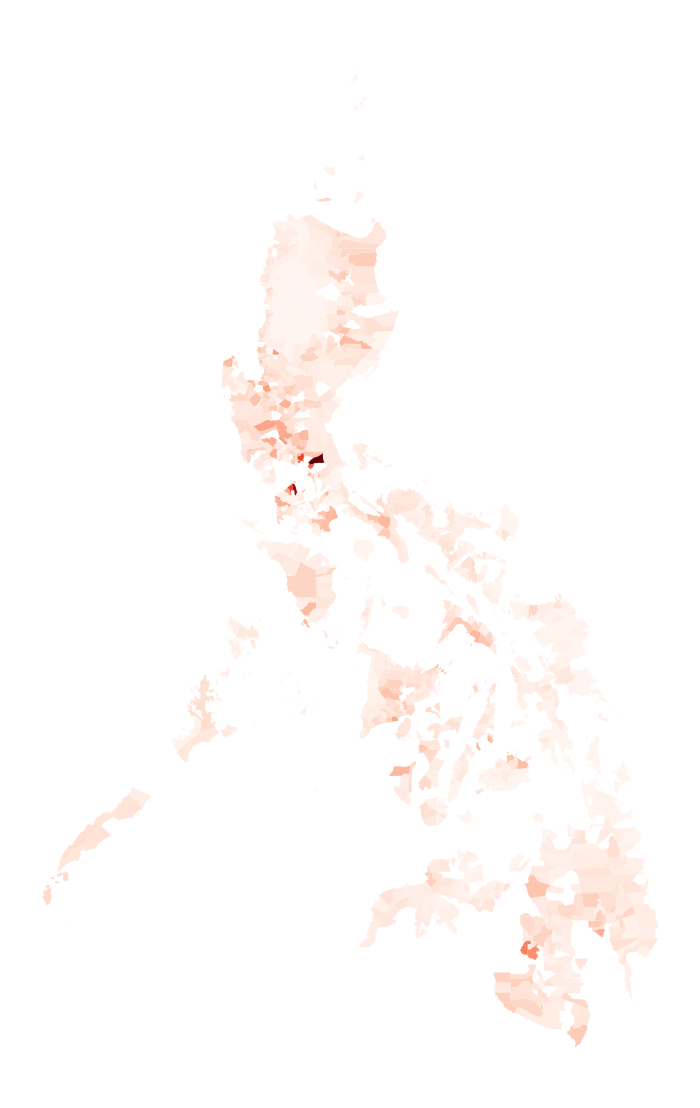

In [28]:
x = data.merge(df)
fig, ax = plt.subplots(1, figsize=(20, 20))
variable = 'HHs WITHOUT ACCESS'
x.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')
plt.savefig('heatmap-hhs.png', dpi=100, transparent=True)

/Users/raei/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/raei/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/raei/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/raei/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.

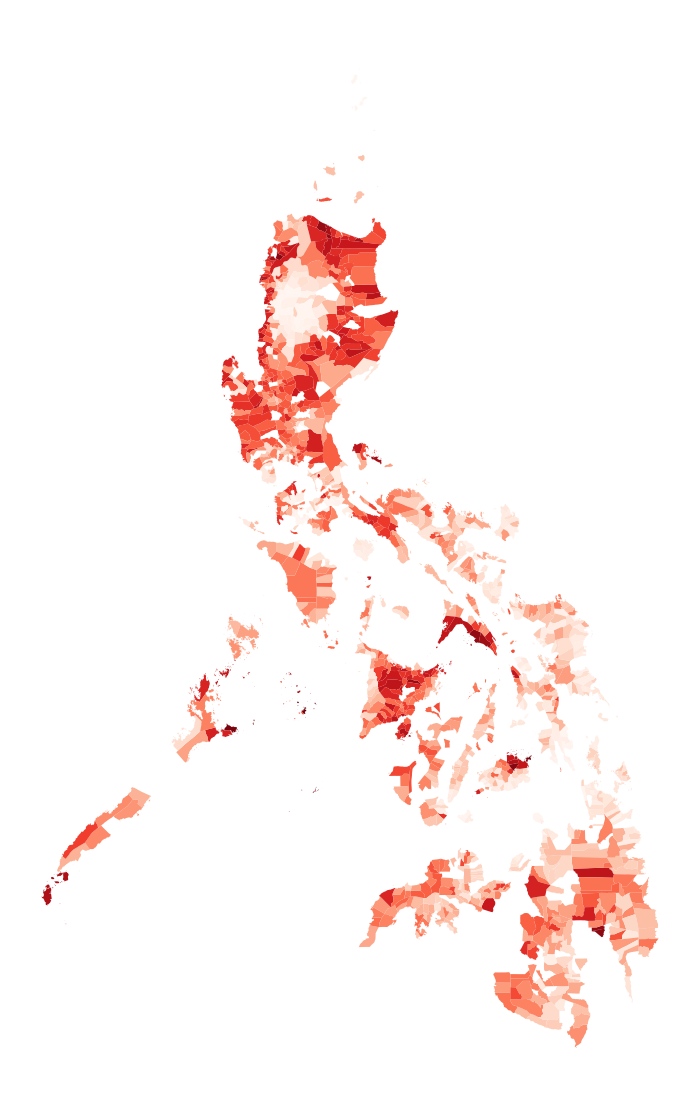

In [29]:
x = data.merge(df)
fig, ax = plt.subplots(1, figsize=(20, 20))
variable = '% HHs WITHOUT ACCESS'
x.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')
plt.savefig('heatmap-%hhs.png', dpi=100, transparent=True)

/Users/raei/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/raei/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/raei/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/raei/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.

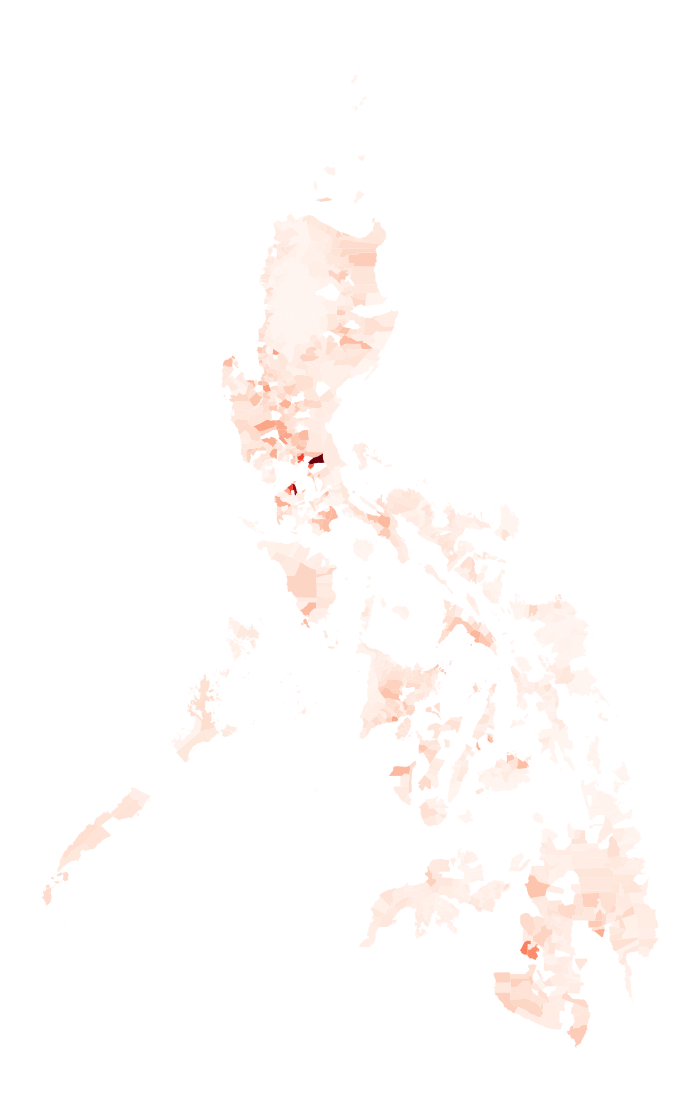

In [30]:
fig, ax = plt.subplots(1, figsize=(20, 20))
variable = 'POPULATION WITHOUT ACCESS'
x.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')
plt.savefig('heatmap.png', dpi=100, transparent=True)

In [31]:
x.describe()

,ID_0,ID_1,ID_2,NO.,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%
count,1354.0,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000
mean,177.0,40.935746,807.284343,683.494830,3.079764,41319.542836,6897.272895,4423.556212,2473.716683,0.331795,5.987445,26504.266741,14815.276096,0.331795
std,0.0,22.868586,484.849952,396.383968,1.473939,34782.242310,5794.406255,3979.388260,2957.651678,0.232018,0.123949,23886.243846,17745.376250,0.232018
min,177.0,1.000000,1.000000,1.000000,1.000000,1297.000000,216.166667,42.000000,0.000000,0.000000,4.000000,252.000000,0.000000,0.000000
25%,177.0,20.000000,378.250000,340.250000,2.000000,20345.750000,3396.083333,1980.750000,525.250000,0.129665,6.000000,11752.500000,3151.500000,0.129665
50%,177.0,40.000000,763.500000,682.500000,3.000000,32514.500000,5459.833333,3372.000000,1728.666667,0.301415,6.000000,20199.000000,10347.000000,0.301415
75%,177.0,60.750000,1237.750000,1024.750000,4.000000,52695.250000,8782.541667,5608.750000,3435.583333,0.513049,6.000000,33607.250000,20559.750000,0.513049
max,177.0,82.000000,1647.000000,1373.000000,6.000000,369222.000000,61537.000000,48652.000000,38688.000000,0.979337,6.000000,291912.000000,232128.000000,0.979337


In [32]:
temp = pd.DataFrame(new.sum(axis=0))
temp[6:12]

,0
TOTAL POPULATION (PSA 2015),5.59467e+07
TOTAL HHs,9.33891e+06
HHs WITH ACCESS,5.9895e+06
HHs WITHOUT ACCESS,3.34941e+06
% HHs WITHOUT ACCESS,449.251
HH Size,8107


In [34]:
new.groupby('Region').sum()

,NO.,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%,ID_0,ID_1,ID_2
Region,,,,,,,,,,,,,,
CAR,2850.0,297.0,1265998.0,2.109997e+05,152792.333333,58207.333333,16.022886,450.0,9.167540e+05,3.492440e+05,16.022886,13275,1374,25373
MIMAROPA,38338.0,201.0,2541291.0,4.235485e+05,284785.833333,138762.666667,23.841045,414.0,1.708715e+06,8.325760e+05,23.841045,12213,4053,83342
REGION I,15486.0,350.0,4040998.0,6.734997e+05,304336.333333,369163.333333,60.585786,696.0,1.826018e+06,2.214980e+06,60.585786,20532,5259,102417
REGION II,20744.0,258.0,2880047.0,4.800078e+05,193363.000000,286644.833333,48.528304,528.0,1.160178e+06,1.719869e+06,48.528304,15576,2990,58094
REGION III,39266.0,250.0,7867449.0,1.311241e+06,779786.027778,531455.472222,47.356669,696.0,4.678716e+06,3.188733e+06,47.356669,20532,5492,109161
REGION IVA,56423.0,330.0,8246576.0,1.374429e+06,919663.833333,454765.500000,37.194055,738.0,5.517983e+06,2.728593e+06,37.194055,21771,4966,99039
REGION IX,71602.0,216.0,2192578.0,3.677492e+05,248369.533333,119379.666667,20.929738,388.0,1.482147e+06,7.104310e+05,20.929738,11505,5258,104822
REGION V,68368.0,324.0,4749278.0,7.915463e+05,578701.833333,212844.500000,27.974249,636.0,3.472211e+06,1.277067e+06,27.974249,18762,3136,60873
REGION VI,87799.0,351.0,4805680.0,8.009467e+05,410546.833333,390399.833333,56.747682,696.0,2.463281e+06,2.342399e+06,56.747682,20532,3133,59159


In [38]:
pop = pd.read_csv('PHPopulation.csv', sep=';', encoding='latin-1')

In [40]:
pop.head()

,"Total population by geographic location (based on 2000, 2010 and 2015 Censuses)"
Geographic Location,2015
PHILIPPINES,100981437
..National Capital Region (NCR),12877253
....City of Manila,1780148
....City of Mandaluyong,386276


In [55]:
pop1 = pop[pop.index.str.contains(r'^\.\.\w')]
pop1

,"Total population by geographic location (based on 2000, 2010 and 2015 Censuses)"
..National Capital Region (NCR),12877253
..Cordillera Administrative Region (CAR),1722006
..Region I (Ilocos Region),5026128
..Region II (Cagayan Valley),3451410
..Region III (Central Luzon),11218177
..Region IV-A (Calabarzon),14414774
..Mimaropa Region,2963360
..Region V (Bicol Region),5796989
..Region VI (Western Visayas),4477247
..Region VII (Central Visayas),6041903


In [53]:
popu = new.groupby('Region').sum()
popu[['TOTAL POPULATION (PSA 2015)']]

,TOTAL POPULATION (PSA 2015)
Region,
CAR,1265998.0
MIMAROPA,2541291.0
REGION I,4040998.0
REGION II,2880047.0
REGION III,7867449.0
REGION IVA,8246576.0
REGION IX,2192578.0
REGION V,4749278.0
REGION VI,4805680.0


In [54]:
popu.shape

(15, 14)

In [56]:
pop1.shape

(15, 1)

In [57]:
pop1.sum(axis=0)

Total population by geographic location (based on 2000, 2010 and 2015 Censuses)    87231704
dtype: int64